<div style="background-color: #3498db; padding-top: 10px; border: 2px solid #2980b9; color: white; text-align: center;">

# MODS205 - Digital Finance

**Professor:** Patrick Waelbroeck

**Students**

DE SENE ALVIZI Yuri

MARTINS BRAGA Arthur

</div>

#### Question 1

**Comment on the article “Crypto’s Richest Rebel” from Fortune April/May 2022 available on the e-campus website using all keywords and concepts covered in the course.**

The article "Crypto's Richest Rebel Goes Legit" delves into the meteoric rise of Changpeng Zhao (C.Z.) and his cryptocurrency exchange, Binance, which has revolutionized the digital finance landscape. From an obscure start, Zhao transformed Binance into the world's largest crypto exchange, boasting $34.1 trillion in crypto trading in a single year and positioning himself as a billionaire. The narrative touches upon the innovative business model and technological prowess that fueled Binance's growth, echoing the course's discussion on fintech innovations and the disruption they bring to traditional financial markets.

However, Binance's journey has been fraught with regulatory challenges, illustrating the complex regulatory landscape digital finance entities navigate. The article highlights Zhao's efforts to pivot towards compliance, including hiring compliance officers and securing licenses in more regulated jurisdictions. This mirrors the course's emphasis on the importance of regulatory compliance and AML/KYC laws in maintaining market integrity and stability.

The narrative also explores the economic aspects of cryptocurrencies and blockchain technology, noting Binance's role in facilitating global crypto transactions and innovating with NFTs and crypto-linked financial products. This aligns with the course's focus on the economic implications of blockchain and the potential for cryptocurrencies to disrupt various sectors.

Zhao's strategic investments, like the stake in Forbes, reflect a vision to integrate crypto more deeply into e-commerce, media, and beyond, embodying the course's discussions on digital finance's potential to transform industries. Yet, the volatility and regulatory scrutiny underscore the financial risks and ethical considerations inherent in rapidly scaling such innovative platforms.

In summary, the article encapsulates the dynamic interplay between innovation, regulation, and market evolution in the digital finance era. It underscores the pivotal role of leadership, strategic adaptation, and compliance in sustaining growth amidst the opportunities and challenges posed by the emerging crypto economy. Through Binance's story, we see the practical application of concepts covered in the course, from market finance fundamentals to the nuances of digital finance regulation and innovation.

#### Question 2

**Comment on the article “Binance CEO Changpeng Zhao charged with money laundering” from Fortune Website 2023-11-23 available on the e-campus website using all keywords and concepts covered in the course**

The article details a significant legal and regulatory development for Binance, the world's largest cryptocurrency exchange, and its CEO, Changpeng "CZ" Zhao. They faced charges from the U.S. Justice Department for violating money-laundering laws and economic sanctions, leading to a landmark $4.3 billion settlement. Zhao agreed to step down and plead guilty, paying an additional $50 million fine, demonstrating the severe repercussions of regulatory non-compliance in the digital finance sector.

The settlement includes the appointment of an independent compliance monitor to ensure Binance adheres to U.S. regulations, with Zhao barred from any involvement for three years. This action underscores the critical importance of anti-money-laundering (AML) and know-your-customer (KYC) laws in maintaining the integrity of financial markets, a key aspect of market finance fundamentals discussed in the course.

The charges spanned money laundering, operating an unlicensed money-transmitting business, and sanctions violations, with specific allegations that Binance deliberately targeted U.S. customers without proper compliance checks. This situation illustrates the complexities of regulatory compliance and the legal frameworks governing digital currencies, reflecting topics covered in digital finance and fintech innovations.

Binance's $4.3 billion penalty—one of the largest corporate penalties in U.S. history—highlights the significant financial and operational risks associated with non-compliance. The involvement of other regulatory bodies, including the Securities and Exchange Commission (SEC) and the Commodity Futures Trading Commission (CFTC), in suing and fining Binance, underscores the regulatory landscape digital finance entities must navigate, echoing the course's discussions on the regulation of financial markets.

This development also reflects on the economic aspects of blockchain technology, as Binance's rapid growth and subsequent legal challenges highlight the disruptive nature of cryptocurrencies and the need for established compliance frameworks. The company's attempts to align with regulatory standards by hiring compliance professionals indicate the ongoing tension between innovation and regulatory adherence in the fintech domain.

Richard Teng's ascension to leadership following Zhao's resignation suggests a strategic pivot towards compliance and regulatory cooperation for Binance, aligning with the course's insights on financial stability and the importance of ethical practices in financial management. 

In summary, the article serves as a case study on the importance of regulatory compliance, the potential legal and financial consequences of violations, and the evolving relationship between the cryptocurrency industry and regulatory authorities. It touches upon several key concepts and vocabularies covered in the course, such as AML, KYC, sanctions compliance, digital finance, and the role of regulatory bodies in shaping the landscape of modern financial markets.

#### Question 3


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

**3.1. Import data in Excel (2 stocks, CAC40 index, 5-week interest rate from the US Treasury). Sort data by date and make sure that all dates coincides for all columns. Adjust cells if there are missing values.**

In [21]:
bnpa_df = pd.read_csv('BN.PA.csv')
cappa_df = pd.read_csv('CAP.PA.csv')
fchi_df = pd.read_csv('^FCHI.csv')
irx_df = pd.read_csv('^IRX.csv')

bnpa_df['Date'] = pd.to_datetime(bnpa_df['Date'])
cappa_df['Date'] = pd.to_datetime(cappa_df['Date'])
fchi_df['Date'] = pd.to_datetime(fchi_df['Date'])
irx_df['Date'] = pd.to_datetime(irx_df['Date'])

all_dates = pd.concat([bnpa_df['Date'], cappa_df['Date'],
                      fchi_df['Date'], irx_df['Date']])
unique_dates = all_dates.unique()

unique_dates = sorted(unique_dates)

bnpa_df = bnpa_df.set_index('Date')
cappa_df = cappa_df.set_index('Date')
fchi_df = fchi_df.set_index('Date')
irx_df = irx_df.set_index('Date')

bnpa_df = bnpa_df.reindex(unique_dates)
cappa_df = cappa_df.reindex(unique_dates)
fchi_df = fchi_df.reindex(unique_dates)
irx_df = irx_df.reindex(unique_dates)

nan_lines = pd.concat([bnpa_df, cappa_df, fchi_df, irx_df])
nan_lines = nan_lines[nan_lines.isna().any(axis=1)]

bnpa_df = bnpa_df.drop(nan_lines.index)
cappa_df = cappa_df.drop(nan_lines.index)
fchi_df = fchi_df.drop(nan_lines.index)
irx_df = irx_df.drop(nan_lines.index)

**3.2. Give a short financial analysis of the two stocks by using relevant concepts of the course.**

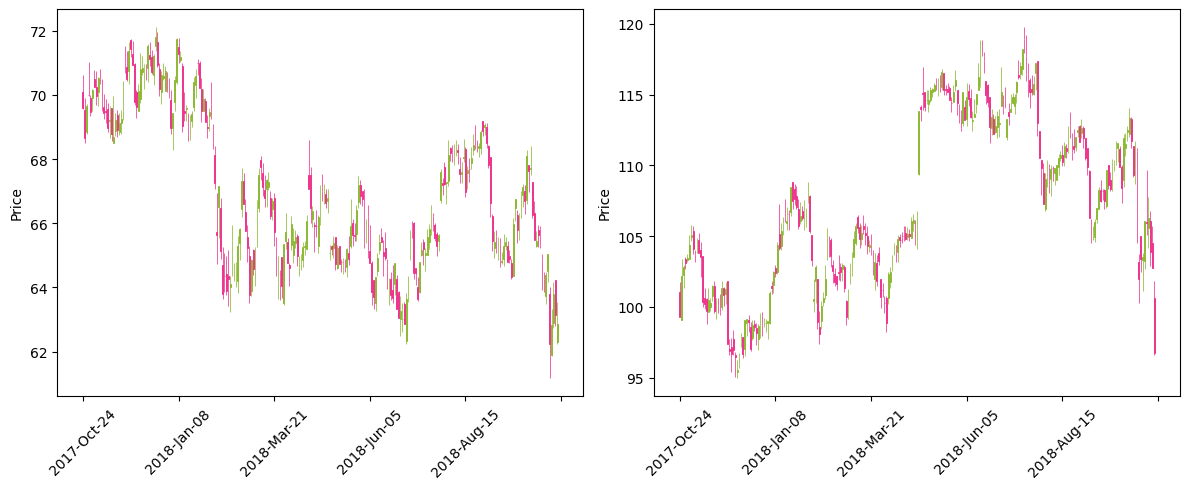

In [4]:
import mplfinance as mpf

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

mpf.plot(bnpa_df, type='candle', ax=axes[0], style='binance')
mpf.plot(cappa_df, type='candle', ax=axes[1], style='binance')

plt.tight_layout()
plt.show()


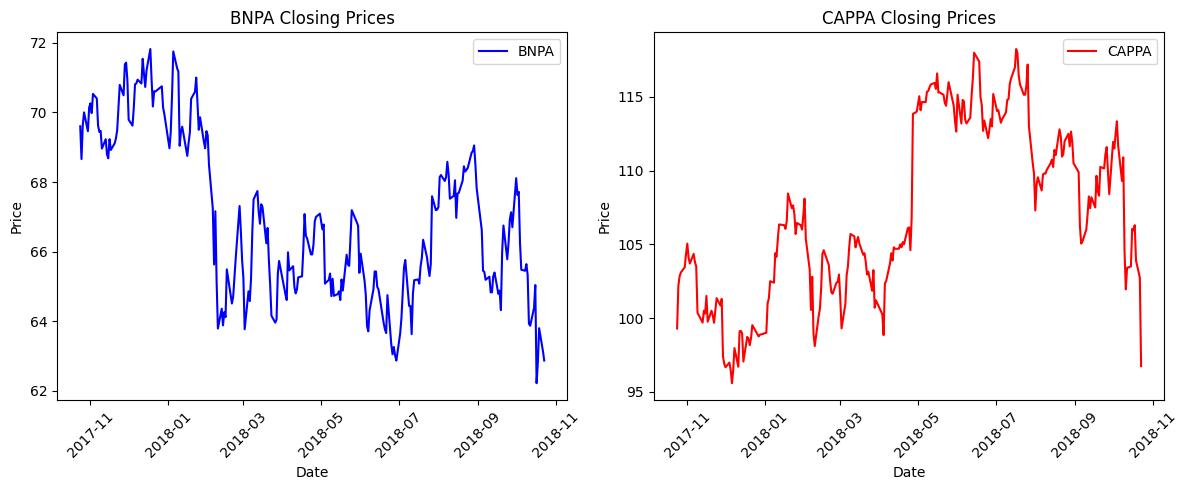

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(bnpa_df.index, bnpa_df['Close'], label='BNPA', color='blue')
axes[0].set_title('BNPA Closing Prices')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

axes[1].plot(cappa_df.index, cappa_df['Close'], label='CAPPA', color='red')
axes[1].set_title('CAPPA Closing Prices')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


**3.3. Compute the return for both stocks and for the CAC40 index. Comment on your results.**

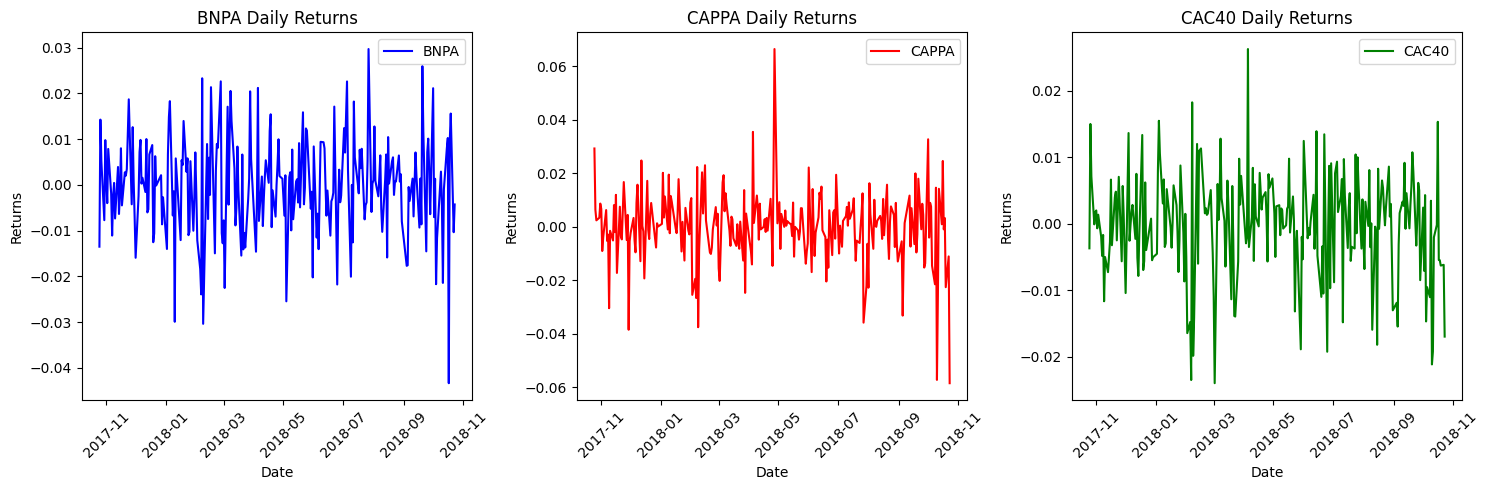

In [6]:
# Computing daily returns
bnpa_daily_returns = bnpa_df['Close'].pct_change().dropna()
cappa_daily_returns = cappa_df['Close'].pct_change().dropna()
cac40_daily_returns = fchi_df['Close'].pct_change().dropna()

# Plotting the returns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(bnpa_daily_returns.index, bnpa_daily_returns,
       label='BNPA', color='blue')
axes[0].set_title('BNPA Daily Returns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Returns')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

axes[1].plot(cappa_daily_returns.index, cappa_daily_returns,
       label='CAPPA', color='red')
axes[1].set_title('CAPPA Daily Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Returns')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

axes[2].plot(cac40_daily_returns.index, cac40_daily_returns,
       label='CAC40', color='green')
axes[2].set_title('CAC40 Daily Returns')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Returns')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend()

plt.tight_layout()
plt.show()

**3.4. Compute the coefficients of Kurtosis and of asymmetry of the 3 series of question 3.3. Plot the histograms and comment on your results**

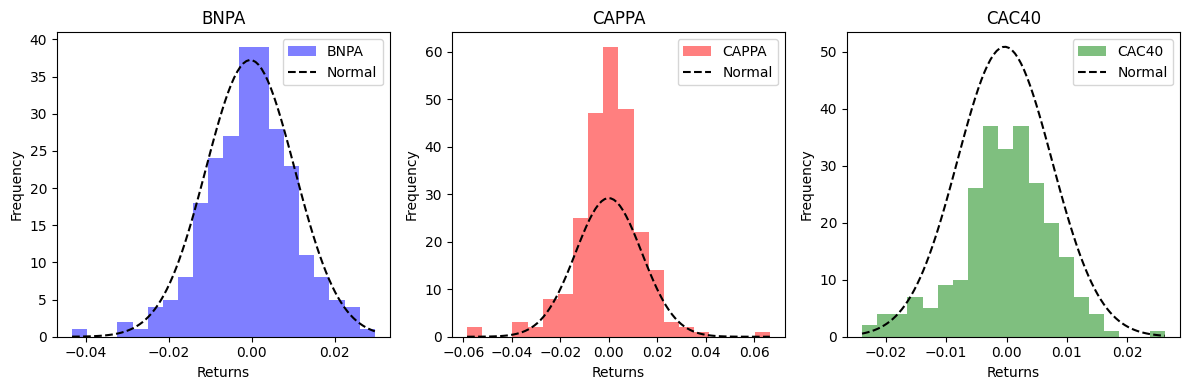

,Stock,Skewness,Kurtosis
0,BNPA,-0.261981,0.910156
1,CAPPA,-0.323975,4.147156
2,CAC40,-0.345872,0.661933


In [7]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plotting histogram for BNPA
axes[0].hist(bnpa_daily_returns, bins=20, alpha=0.5, label='BNPA', color='blue')
axes[0].set_title('BNPA')
axes[0].set_xlabel('Returns')
axes[0].set_ylabel('Frequency')

# Adding normal distribution line
x = np.linspace(bnpa_daily_returns.min(), bnpa_daily_returns.max(), 100)
y = norm.pdf(x, bnpa_daily_returns.mean(), bnpa_daily_returns.std())
axes[0].plot(x, y, color='black', linestyle='--', label='Normal')
axes[0].legend()

# Plotting histogram for CAPPA
axes[1].hist(cappa_daily_returns, bins=20, alpha=0.5, label='CAPPA', color='red')
axes[1].set_title('CAPPA')
axes[1].set_xlabel('Returns')
axes[1].set_ylabel('Frequency')

# Add normal distribution line
x = np.linspace(cappa_daily_returns.min(), cappa_daily_returns.max(), 100)
y = norm.pdf(x, cappa_daily_returns.mean(), cappa_daily_returns.std())
axes[1].plot(x, y, color='black', linestyle='--', label='Normal')
axes[1].legend()

# Plot histogram for CAC40
axes[2].hist(cac40_daily_returns, bins=20, alpha=0.5, label='CAC40', color='green')
axes[2].set_title('CAC40')
axes[2].set_xlabel('Returns')
axes[2].set_ylabel('Frequency')

# Adding normal distribution line
x = np.linspace(cac40_daily_returns.min(), cac40_daily_returns.max(), 100)
y = norm.pdf(x, cac40_daily_returns.mean(), cac40_daily_returns.std())
axes[2].plot(x, y, color='black', linestyle='--', label='Normal')
axes[2].legend()

plt.tight_layout()
plt.show()


# Computing the skewness of the daily returns
bnpa_skewness = skew(bnpa_daily_returns)
cappa_skewness = skew(cappa_daily_returns)
cac40_skewness = skew(cac40_daily_returns)

# Computing the kurtosis of the daily returns
bnpa_kurtosis = kurtosis(bnpa_daily_returns)
cappa_kurtosis = kurtosis(cappa_daily_returns)
cac40_kurtosis = kurtosis(cac40_daily_returns)

data = {'Stock': ['BNPA', 'CAPPA', 'CAC40'],
        'Skewness': [bnpa_skewness, cappa_skewness, cac40_skewness],
        'Kurtosis': [bnpa_kurtosis, cappa_kurtosis, cac40_kurtosis]}

df_skew_kurt = pd.DataFrame(data)
df_skew_kurt

Result analysis:

1. **Skewness**:
   - A negative skewness indicates that the distribution of daily returns is skewed to the left, meaning there's a longer tail on the negative side of the distribution. 
   - All three stocks have negative skewness values, with CAPPA exhibiting the most negative skewness (-0.323975), followed by CAC40 (-0.345872), and BNPA (-0.261981). This suggests that these stocks tend to have more frequent but moderate negative returns compared to positive returns.

2. **Kurtosis**:
   - CAPPA stands out with a relatively higher kurtosis value (4.147156), indicating heavier tails in its distribution compared to the normal distribution. This suggests that CAPPA's daily returns have more extreme values, either positive or negative, compared to BNPA and CAC40.
   - Both BNPA (0.910156) and CAC40 (0.661933) have kurtosis values close to 1, which suggests that their distributions are closer to the normal distribution in terms of tail behavior compared to CAPPA. It's also notable that BNPA is the closest to the normal distribution.

In summary, CAPPA exhibits the most extreme behavior with heavier tails in its distribution (high kurtosis) and a strong skewness towards the negative side. BNPA and CAC40 have less extreme distributions with negative skewness indicating more frequent but moderate negative returns, and their kurtosis values suggest slightly heavier tails compared to a normal distribution.

**3.5. Compute the standard errors of the return for both stocks for the full period and then for 3 sub-periods of equal size. Is volatility constant?**


In [8]:
# Computing the standard errors of the return for the full period
bnpa_std_full_error = bnpa_daily_returns.std()
cappa_std_full_error = cappa_daily_returns.std()
cac40_std_full_error = cac40_daily_returns.std()


# Dividing the daily returns into three periods
bnpa_returns_periods = np.array_split(bnpa_daily_returns, 3)
cappa_returns_periods = np.array_split(cappa_daily_returns, 3)
cac40_returns_periods = np.array_split(cac40_daily_returns, 3)

# Calculating the standard deviation of each period
bnpa_std_periods = [period.std() for period in bnpa_returns_periods]
cappa_std_periods = [period.std() for period in cappa_returns_periods]
cac40_std_periods = [period.std() for period in cac40_returns_periods]

data = {'Stock': ['BNPA', 'CAPPA', 'CAC40'],
        'Full Period': [bnpa_std_full_error, cappa_std_full_error, cac40_std_full_error],
        'Period 1': [bnpa_std_periods[0], cappa_std_periods[0], cac40_std_periods[0]],
        'Period 2': [bnpa_std_periods[1], cappa_std_periods[1], cac40_std_periods[1]],
        'Period 3': [bnpa_std_periods[2], cappa_std_periods[2], cac40_std_periods[2]]}

standardErrorsDf = pd.DataFrame(data)
standardErrorsDf

,Stock,Full Period,Period 1,Period 2,Period 3
0,BNPA,0.010716,0.010905,0.010172,0.011173
1,CAPPA,0.013675,0.013031,0.012642,0.015205
2,CAC40,0.007846,0.007824,0.007835,0.007950


Testing if the volatility is constant at different periods using Using Brown-Forsythe Test:

- $H_0$: The volatility, represented by the standard error of returns, is constant over all periods.

- $H_1$: The volatility is not constant.


In [9]:
def brownForsytheTest(returns_periods):
    _, p_value = stats.levene(*returns_periods, center='median')
    return p_value

testResults = [brownForsytheTest(bnpa_returns_periods), brownForsytheTest(
    cappa_returns_periods), brownForsytheTest(cac40_returns_periods)]

alpha = 0.05
data = {'Stock': ['BNPA', 'CAPPA', 'CAC40'],
        'Brown-Forsythe Test': testResults,
        'Reject Null Hypothesis': [p_value < alpha for p_value in testResults]}

testDf = pd.DataFrame(data)
testDf

,Stock,Brown-Forsythe Test,Reject Null Hypothesis
0,BNPA,0.844949,False
1,CAPPA,0.349744,False
2,CAC40,0.715637,False


For all three periods, the p-value of all stocks is more than 0.05, which means we fail to reject the null hypothesis. This suggests that the volatility is constant over all periods for all stocks.

**3.6. Compute the correlation between each stock and the CAC40. Comment on your results.**

Using Pearson correlation coefficient and p-value for testing non-correlation.

- $H_0:$ There is not a relationship between $\text{stock}_i$ and CAC40

- $H_1:$ There is a relationship between $\text{stock}_i$ and CAC40

In [10]:
# Computing the correlation between each stock and the CAC40
correlation_bnpa = stats.pearsonr(fchi_df['Close'], bnpa_df['Close'])
correlation_cappa = stats.pearsonr(fchi_df['Close'], cappa_df['Close'])

alpha = 0.05

data = {'Stock': ['BNPA', 'CAPPA'],
        'Correlation with CAC40': [correlation_bnpa[0], correlation_cappa[0]],
        'P-value': [correlation_bnpa[1], correlation_cappa[1]],
        'Reject Null Hypothesis': [correlation_bnpa[1] < alpha, correlation_cappa[1] < alpha]}

correlationDf = pd.DataFrame(data)
correlationDf

,Stock,Correlation with CAC40,P-value,Reject Null Hypothesis
0,BNPA,0.402717,3.986898e-11,True
1,CAPPA,0.506235,1.304248e-17,True


Both stocks BNPA and CAPPA have relevant correlation with CAC40, with p-values less than 0.05. This suggests that there is a relationship between the stocks and CAC40. The correlation coefficient for BNPA is 0.40, which is a strong positive correlation, and for CAPPA is 0.51, which is also a strong positive correlation. This means that the stocks move in the same direction as CAC40, and the strength of the relationship is strong. 

**3.7. Compute the returns of a portfolio in which both stocks have an equal weight. Compute the average return and the standard deviation over the whole sample period. Comment on your results.**


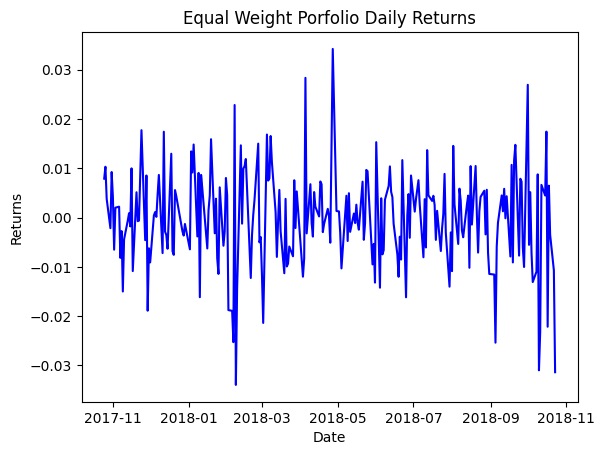

,Average Return,Standard Deviation
0,-0.000182,0.009863


In [11]:
portfolio_returns = (bnpa_daily_returns + cappa_daily_returns) / 2

plt.plot(portfolio_returns.index, portfolio_returns, color='blue')
plt.title('Equal Weight Porfolio Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

average_return = portfolio_returns.mean()

standard_deviation = portfolio_returns.std()

data = {'Average Return': [average_return], 'Standard Deviation': [standard_deviation]}
df_stats = pd.DataFrame(data)
df_stats


An average return of -0.00018 indicates that, on average, the portfolio generates a negative return. However, the magnitude of the average return is relatively small. This suggests that the portfolio's performance may not be significantly outperforming the market or other investment options.

A standard deviation of 0.0098 indicates that the portfolio's returns have relatively low volatility. This means that the portfolio's performance is relatively stable and consistent over time.


**3.8. Consider a portfolio with one stock and the risk-free interest rate (you can choose the stock out of the two that are available). What is the optimal portfolio allocation between these two assets for an investor with a utility function presented in the course and A=1.5?**


In [12]:
E_R = cappa_returns_periods[0].mean()  # Expected return of the stock
Rf = irx_df['Close'].mean()  # Risk-free interest rate
A = 1.5  # Investor's risk aversion coefficient
Var_R = bnpa_returns_periods[0].var()  # Variance of the stock's returns

w_star = (E_R - Rf) / (A * Var_R)
if w_star < 0:
    w_star = 0
elif w_star > 1:
    w_star = 1

print(f"The optimal weight for the stock is {w_star:.2f}%")


The optimal weight for the stock is 0.00%


**3.9. Consider the following 3 portfolios: portfolio 1 has stock 1 as the only component;**
**portfolio 2 has stock 2 as the only component; portfolio 3 is the portfolio of question 3.7.**
**These are the only portfolio available to investors.**\
**Draw the efficient frontier. Which portfolio are inefficient?**


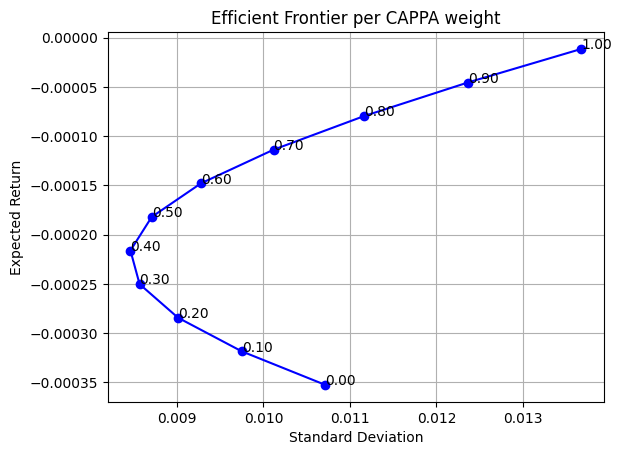

In [13]:
num_portfolios = 11

# Defining the returns and standard deviations for each stock
returns = np.array([bnpa_daily_returns.mean(), cappa_daily_returns.mean()])
std_devs = np.array([bnpa_daily_returns.std(), cappa_daily_returns.std()])
cov_matrix = np.cov(bnpa_daily_returns.dropna(), cappa_daily_returns.dropna())

weights = np.linspace(0, 1, num_portfolios)
weights = np.column_stack((weights, 1 - weights))

portfolio_returns = np.dot(weights, returns)

prod_term = 2 * cov_matrix[0, 1] * np.array([weights[:, 0] * weights[:, 1]])
prod_term = prod_term.reshape(num_portfolios, )

portfolio_std_devs = np.sqrt(np.dot(weights**2, std_devs**2)) + prod_term

# Plotting the efficient frontier
plt.plot(portfolio_std_devs, portfolio_returns, marker='o', linestyle='-', color='b')

# Adding labels for each point
for i in range(len(portfolio_std_devs)):
    plt.annotate(f'{weights[i][1]:.2f}', (portfolio_std_devs[i], portfolio_returns[i]))

plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier per CAPPA weight')
plt.grid(True)
plt.show()


From the efficient frontier above, we conclude that only portfolio 1 (containing only BNPA stocks) is inneficient, since, differently the other two, it is in the decending part of the curve, which means that for higher risks (standard deviation) the portfolio gives lower returns.

Based on the efficient frontier presented, we can infer that Portfolio 1, containing only BNPA stocks, appears to be inefficient. This is indicated by its position on the descending portion of the curve. In contrast to the other portfolios, this particular configuration exhibits a reduction in expected returns even as risk (measured as standard deviation) increases. Generally, in efficient portfolio theory, an optimal portfolio should compensate for higher risk with the potential for higher returns. Therefore, Portfolio 1 deviates from this principle by offering lower returns at a point where the risk is escalating.

3.10. Consider the portfolio of question 3.7. Compute the Sharpe ratio, the Sortino ratio, the
Sterling ratio. Why are there differences between these ratios?


3.12. Compute the empirical VAR at 1% for the same portfolio. Compute the 1st percentile of the normal distribution with mean and variance corresponding respectively to the empirical mean and to the empirical variance. Comment on your results.


3.13. Compute the VAR using resampling with 1000 observations. Compute the 1% VAR on the simulated data set. Comment on your results.


#### Question 4

Run an automated trading algorithm using any method you want (moving averages, candlesticks, patterns, ML, …) over the sample period. You can only have 3 positions: buy/sell, short/cover, do nothing. You cannot use derivative products. Can you beat the market?


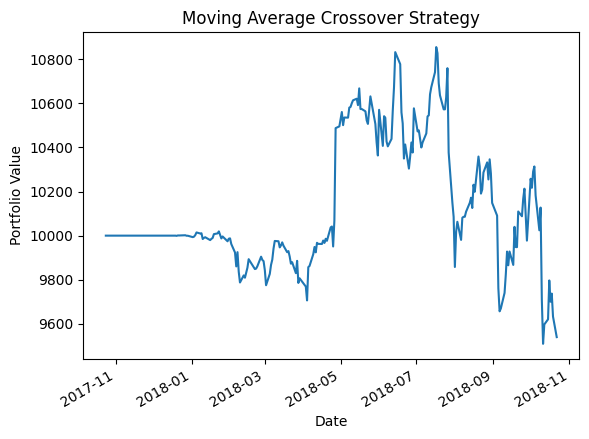

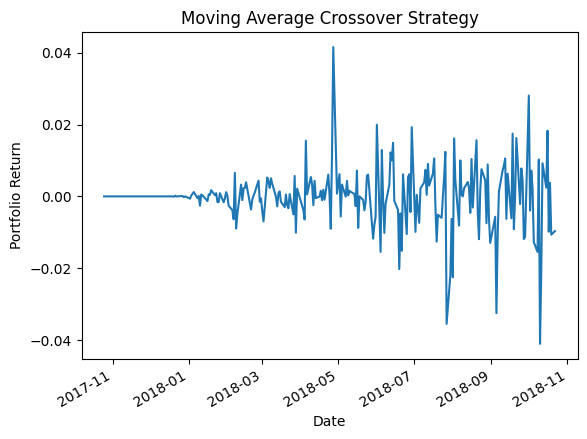

,BNPA,CAPPA,Cash,Total,Return
Date,,,,,
2018-10-22,36,55,1615.800039,9540.090003,-0.009679


In [147]:
# Combine all dataframes and extract prices
prices = pd.concat([bnpa_df['Close'], cappa_df['Close']], axis=1)
prices.columns = ['BNPA', 'CAPPA']

# Implement Moving Average Crossover Strategy
short_window = 40
long_window = 100

# Calculate moving averages
short_mavg = prices.rolling(window=short_window, min_periods=1, center=False).mean()
long_mavg = prices.rolling(window=long_window, min_periods=1, center=False).mean()

# Initialize capital
initial_capital = 10000
capital = initial_capital

# Initialize positions
positions = {'BNPA': 0, 'CAPPA': 0}

# Initialize trade signals
signals = pd.DataFrame(index=prices.index, columns=['BNPA', 'CAPPA'])

# Generate trading signals
for symbol in prices.columns:
    signals[symbol] = np.where(short_mavg[symbol] > long_mavg[symbol], 1.0, 0.0)

# Initialize the portfolio DataFrame with positions and cash
portfolio = pd.DataFrame(0, index=signals.index, columns=['BNPA', 'CAPPA', 'Cash'])
portfolio['Cash'].iloc[0] = capital

# Simulate trading by iterating through the DataFrame
for i in range(len(signals) - 1):
    for symbol in prices.columns:
        # Buy signal
        if signals[symbol].iloc[i] == 1.0:
            # Check if there is enough capital to buy
            if capital >= prices[symbol].iloc[i + 1]:
                positions[symbol] += 1  # Increase position
                capital -= prices[symbol].iloc[i + 1]  # Decrease capital
        # Sell signal
        elif signals[symbol].iloc[i] == 0.0:
            # Check if there are positions to sell
            if positions[symbol] > 0:
                capital += prices[symbol].iloc[i + 1]  # Increase capital
                positions[symbol] -= 1  # Decrease position

        portfolio.loc[prices.index[i], symbol] = positions[symbol]  # Update positions
    
    portfolio.loc[signals.index[i], 'Cash'] = capital  # Update cash balance


# Calculate total portfolio value
portfolio['Total'] = portfolio['BNPA'] * prices['BNPA'] + portfolio['CAPPA'] * prices['CAPPA'] + portfolio['Cash']

# removing last line because we don't have the next day price
portfolio = portfolio[:-1]

# Plot portfolio value
portfolio['Total'].plot()
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()


# ploting % return portfolio

portfolio['Return'] = portfolio['Total'].pct_change()
portfolio['Return'].plot()
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Return')
plt.show()

# printing last row
portfolio.tail(1)
